In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import pickle

## Trento

### Week 2

In [2]:
week = 2
city = 'tn'
max_id = 10000
data = pd.read_csv(f'../data/{city}_to_{city}/{city}_to_{city}_week{week}.csv')
print(data.shape)
data.head()

(23610829, 3)


,square_id1,square_id2,strength
0,38,38,0.209739
1,38,39,0.098653
2,38,40,0.043984
3,38,154,0.186532
4,38,155,0.142802


In [3]:
with open(f'hotspots_{city}.pkl', 'rb') as file:
    hotspots = pickle.load(file)

#### Degree Centrality Uncleaned

In [4]:
degree_centralities = list()
for hp in hotspots:
    degree_centralities.append(data[(data.square_id1 == hp) &  
                                    (~(data.square_id2 == hp))].strength.sum())

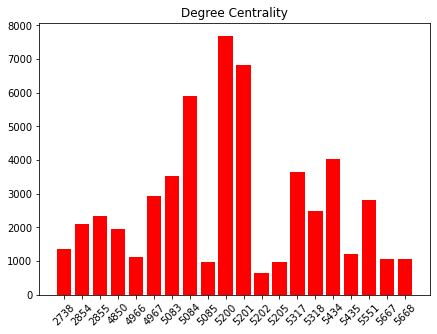

In [5]:
plt.figure(figsize=(7,5))
plt.title('Degree Centrality')
plt.bar(range(len(degree_centralities)), degree_centralities, color='red')
plt.xticks(range(len(degree_centralities)), hotspots, rotation=45)
plt.savefig(f'../plots/degree_centrality_{city}_week{week}_uncleaned.png')

#### Cleaning Data

In [6]:
data_cleaned = data[(data.square_id1.isin(hotspots)) & 
                    (data.square_id2.isin(hotspots))]
print(data_cleaned.shape)
data_cleaned.head()

(400, 3)


,square_id1,square_id2,strength
2787509,2738,2738,66.353771
2787566,2738,2854,62.772619
2787567,2738,2855,100.898060
2788732,2738,4850,2.824862
2788815,2738,4966,0.887545


#### Degree Centrality Clean

In [7]:
degree_centralities = list()
for hp in hotspots:
    degree_centralities.append(data_cleaned[(data_cleaned.square_id1 == hp) &  
                                            (~(data_cleaned.square_id2 == hp))].strength.sum())

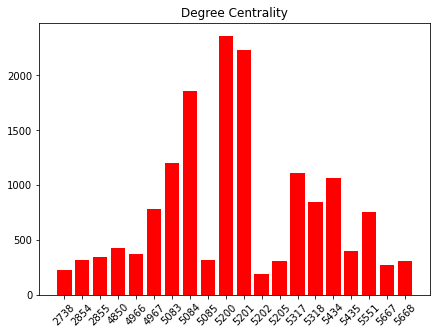

In [8]:
plt.figure(figsize=(7,5))
plt.title('Degree Centrality')
plt.bar(range(len(degree_centralities)), degree_centralities, color='red')
plt.xticks(range(len(degree_centralities)), hotspots, rotation=45)
plt.savefig(f'../plots/degree_centrality_{city}_week{week}.png')

#### Building Graph

In [9]:
G = nx.DiGraph()

In [10]:
for row in data_cleaned.values:
    G.add_edge(row[0], row[1], strength=row[2])

#### Closeness Centrality

In [11]:
closeness_centralities = list()
for hp in hotspots:
    cc = nx.closeness_centrality(G, hp, distance='strength') / 19
    closeness_centralities.append(cc)

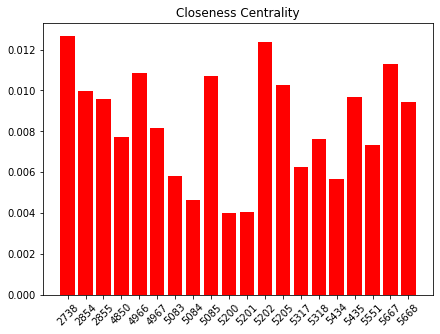

In [12]:
plt.figure(figsize=(7,5))
plt.title('Closeness Centrality')
plt.bar(range(len(closeness_centralities)), closeness_centralities, color='red')
plt.xticks(range(len(closeness_centralities)), hotspots, rotation=45)
plt.savefig(f'../plots/closeness_centrality_{city}_week{week}.png')

#### Betweenness Centrality

In [13]:
betweenness_centrality = nx.betweenness_centrality(G, normalized=False, weight='strength')

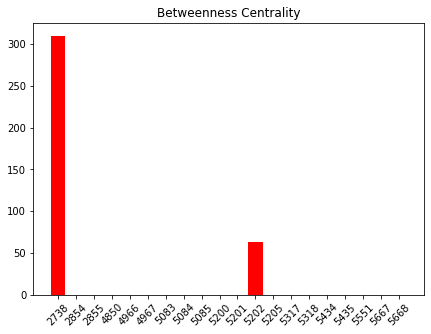

In [14]:
plt.figure(figsize=(7,5))
plt.title('Betweenness Centrality')
plt.bar(range(len(betweenness_centrality)), betweenness_centrality.values(), color='red')
plt.xticks(range(len(betweenness_centrality)), [int(x) for x in betweenness_centrality.keys()], rotation=45)
plt.savefig(f'../plots/betweenness_centrality_{city}_week{week}.png')

#### PageRank Centrality

In [15]:
pagerank_centrality = nx.pagerank(G, weight='strength')
pagerank_centrality

{2738.0: 0.026325296551187014,
 2854.0: 0.03701926681714958,
 2855.0: 0.04098387179958877,
 4850.0: 0.028501517064032124,
 4966.0: 0.02525156306290489,
 4967.0: 0.04971805937621828,
 5083.0: 0.06719579286293387,
 5084.0: 0.10661383055982418,
 5085.0: 0.020732594679977723,
 5200.0: 0.14173793401992885,
 5201.0: 0.12506183137578644,
 5202.0: 0.016392563155398974,
 5205.0: 0.01987166427798468,
 5317.0: 0.058879460519195195,
 5318.0: 0.04467344994845555,
 5434.0: 0.06777630266324929,
 5435.0: 0.025247824540063087,
 5551.0: 0.04610368381708035,
 5667.0: 0.02603003500020758,
 5668.0: 0.02588345790883411}

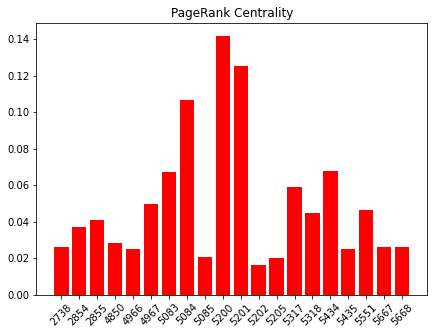

In [16]:
plt.figure(figsize=(7,5))
plt.title('PageRank Centrality')
plt.bar(range(len(pagerank_centrality)), pagerank_centrality.values(), color='red')
plt.xticks(range(len(pagerank_centrality)), [int(x) for x in pagerank_centrality.keys()], rotation=45)
plt.savefig(f'../plots/pagerank_centrality_{city}_week{week}.png')

#### Eigenvector Centrality

In [17]:
eigenvector_centrality = nx.eigenvector_centrality(G, weight='strength')
eigenvector_centrality

{2738.0: 0.01095466380821981,
 2854.0: 0.026038090438736866,
 2855.0: 0.02181229780302787,
 4850.0: 0.051423183738796376,
 4966.0: 0.044131180053070575,
 4967.0: 0.10334671968593133,
 5083.0: 0.20487282163452364,
 5084.0: 0.3618576018647902,
 5085.0: 0.03972659040870692,
 5200.0: 0.6984545903575226,
 5201.0: 0.5063979855292426,
 5202.0: 0.023136103899959657,
 5205.0: 0.03886478247835189,
 5317.0: 0.1546195465104335,
 5318.0: 0.10764141031548126,
 5434.0: 0.1364759638468887,
 5435.0: 0.042864452139848165,
 5551.0: 0.0696167476131867,
 5667.0: 0.028986423890844715,
 5668.0: 0.031538415056736005}

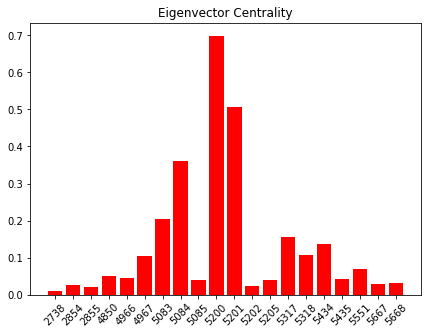

In [18]:
plt.figure(figsize=(7,5))
plt.title('Eigenvector Centrality')
plt.bar(range(len(eigenvector_centrality)), eigenvector_centrality.values(), color='red')
plt.xticks(range(len(eigenvector_centrality)), [int(x) for x in eigenvector_centrality.keys()], rotation=45)
plt.savefig(f'../plots/eigenvector_centrality_{city}_week{week}.png')